<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/puc/sprint1/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO2 Emissions by Country


The content of this study will be in Portuguese because it is a work developed for a Brazilian Postgraduate

O conteúdo deste estudo estará em portuques já que é um estudo feito para um trabalho de uma pós-graduação brasileira.

## Informações sobre o dataset


Este conjunto de dados fornece informações detalhadas sobre as emissões globais de CO2 fóssil por país de 2002 a 2022

## Informações sobre as Colunas

 - Country: The name of the country. (String)
  - País: O nome do país. (String)
---
 - ISO 3166-1 alpha-3: The three-letter code for the country. (String)
  - ISO 3166-1 alfa-3: O código de três letras do país. (String)
---
 - Year: The year of the data. (Integer)
  - Ano: O ano dos dados. (Integer)
---
 - Total: The total amount of CO2 emissions for the country in the given year. (Float) (Mt)
  - Total: A quantidade total de emissões de CO2 para o país no ano determinado. (Float) (Mt)
 ---
 - Coal: The amount of CO2 emissions from coal for the country in the given year. (Float) (Mt)
  - Carvão: A quantidade de emissões de CO2 do carvão para o país em determinado ano. (Float) (Mt)
---
 - Oil: The amount of CO2 emissions from oil for the country in the given year. (Float) (Mt)
  - Petróleo: A quantidade de emissões de CO2 do petróleo para o país em determinado ano. (Float) (Mt)
---
 - Gas: The amount of CO2 emissions from gas for the country in the given year. (Float) (Mt)
  - Gás: A quantidade de emissões de CO2 do gás para o país no ano determinado. (Float) (Mt)
---
 - Cement: The amount of CO2 emissions from cement production for the country in the given year. (Float) (Mt)
  - Cimento: A quantidade de emissões de CO2 da produção de cimento para o país em determinado ano. (Float) (Mt)
---
 - Flaring: The amount of CO2 emissions from flaring operations for the country in the given year. (Float) (Mt)
  - Queima: A quantidade de emissões de CO2 das operações de queima para o país em um determinado ano. (Float) (Mt)
---
 - Other: The amount of CO2 emissions from other sources for the country in the given year. (Float) (Mt)
  - Outro: A quantidade de emissões de CO2 de outras fontes para o país em determinado ano. (Float) (Mt)
---
 - Per Capita: The amount of CO2 emissions per capita for the country in the given year. (Float) (t)
  - Per Capita: A quantidade de emissões de CO2 per capita para o país em determinado ano. (Float) (t)
---

**Unit // Unidade:** 

(Mt) = Milhões de toneladas

(t) = toneladas

# Funções


In [92]:
# Porcentagem de na
def df_missings(dataframe):
  '''
  Retorno DF com valor total de Missings e sua porcentagem
  '''
  
  total_na = dataframe.isna().sum() # Total na por coluna
  porcent_na = ((dataframe.isna().sum() / len(dataframe))*100).round(1).astype(str)+'%' # Porcentagem na por coluna

  # Df dos missings 
  df_missing = pd.DataFrame({
      'Colunas': dataframe.columns,
      'Total na': total_na.values,
      'Porcentagem na': porcent_na.values
  })

  print("\n --- Df dos Missings por coluna ---")
  display(df_missing)



import requests
from PIL import Image
from io import BytesIO

def show_imagem(url):
  response = requests.get(url)
  imagem = Image.open(BytesIO(response.content))
  # Imprima a imagem
  imagem.show()


# Importação e tradução

In [93]:
# ----------- Imports -----------
import pandas as pd
import seaborn as sns
import numpy as np

adress_data = 'https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/CO2_emissions.csv'
df_co2 = pd.read_csv(adress_data)
df_co2.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

In [94]:
# Traduzindo e renomeando colunas 
df = df_co2.rename(columns={
    'Country': 'pais', 
    'ISO 3166-1 alpha-3': 'sigla_pais', 
    'Year': 'ano', 
    'Total':'total', 
    'Coal': 'carvao', 
    'Oil': 'petroleo', 
    'Gas':'gas', 
    'Cement':'cimento',
    'Flaring': 'queima',
    'Other': 'outros',
    'Per Capita': 'por_pessoa'})
df.head()

pais sigla_pais   ano  total  carvao  petroleo  gas  cimento  \
0  Afghanistan        AFG  1750    0.0     NaN       NaN  NaN      NaN   
1  Afghanistan        AFG  1751    0.0     NaN       NaN  NaN      NaN   
2  Afghanistan        AFG  1752    0.0     NaN       NaN  NaN      NaN   
3  Afghanistan        AFG  1753    0.0     NaN       NaN  NaN      NaN   
4  Afghanistan        AFG  1754    0.0     NaN       NaN  NaN      NaN   

   queima  outros  por_pessoa  
0     NaN     NaN         NaN  
1     NaN     NaN         NaN  
2     NaN     NaN         NaN  
3     NaN     NaN         NaN  
4     NaN     NaN         NaN

In [95]:
# Verificar se o formato das colunas estão corretos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pais        63104 non-null  object 
 1   sigla_pais  61472 non-null  object 
 2   ano         63104 non-null  int64  
 3   total       62904 non-null  float64
 4   carvao      21744 non-null  float64
 5   petroleo    21717 non-null  float64
 6   gas         21618 non-null  float64
 7   cimento     20814 non-null  float64
 8   queima      21550 non-null  float64
 9   outros      1620 non-null   float64
 10  por_pessoa  18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


# Limpesa dos Missings


Como este projeto é um estudo acadêmico e não existe a necessidade de finaliza-lo com agilidade, sera feita uma análise completa e bem detalhada dos dados em missings.

O df possui 63104 linhas 

 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0         pais         0           0.0%
1   sigla_pais      1632           2.6%
2          ano         0           0.0%
3        total       200           0.3%
4       carvao     41360          65.5%
5     petroleo     41387          65.6%
6          gas     41486          65.7%
7      cimento     42290          67.0%
8       queima     41554          65.9%
9       outros     61484          97.4%
10  por_pessoa     44130          69.9%


 --- Grafico de Missings por coluna ---


<Axes: >

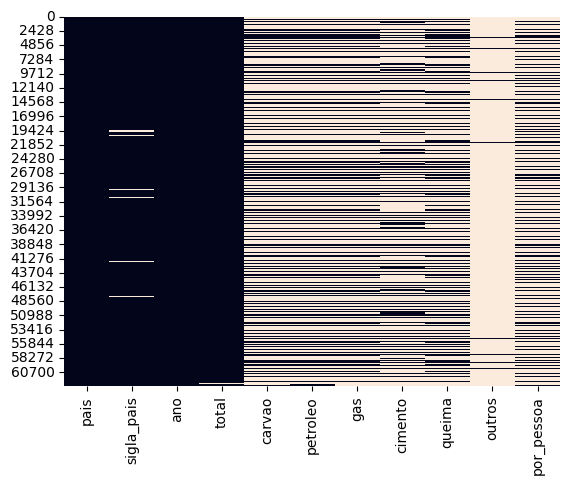

In [96]:
# Verificar os Missings
print(f"O df possui {df.shape[0]} linhas ")

# USar função criada
df_missings(df)

print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)

### Colunas de emissão de CO2

In [97]:
# A maioria dos missings estão nas colunas de emissão de CO2 
# todos os missigs destas colunas vou transformar em 0
df[['total','carvao','petroleo','gas','cimento','queima','outros','por_pessoa']] = df[['total',
'carvao','petroleo','gas','cimento','queima','outros','por_pessoa']].fillna(0)
display(df)

pais sigla_pais   ano         total        carvao      petroleo  \
0      Afghanistan        AFG  1750      0.000000      0.000000      0.000000   
1      Afghanistan        AFG  1751      0.000000      0.000000      0.000000   
2      Afghanistan        AFG  1752      0.000000      0.000000      0.000000   
3      Afghanistan        AFG  1753      0.000000      0.000000      0.000000   
4      Afghanistan        AFG  1754      0.000000      0.000000      0.000000   
...            ...        ...   ...           ...           ...           ...   
63099       Global        WLD  2017  36096.739276  14506.973805  12242.627935   
63100       Global        WLD  2018  36826.506600  14746.830688  12266.016285   
63101       Global        WLD  2019  37082.558969  14725.978025  12345.653374   
63102       Global        WLD  2020  35264.085734  14174.564010  11191.808551   
63103       Global        WLD  2021  37123.850352  14979.598083  11837.159116   

               gas      cimento      queima      outros  por_pessoa  
0         0.000000     0.000000    0.000000    0.000000    0.000000  
1         0.000000     0.000000    0.000000    0.000000    0.000000  
2         0.000000     0.000000    0.000000    0.000000    0.000000  
3         0.000000     0.000000    0.000000    0.000000    0.000000  
4         0.000000     0.000000    0.000000    0.000000    0.000000  
...            ...          ...         ...         ...         ...  
63099  7144.928128  1507.923185  391.992176  302.294047    4.749682  
63100  7529.846784  1569.218392  412.115746  302.478706    4.792753  
63101  7647.528220  1617.506786  439.253991  306.638573    4.775633  
63102  7556.290283  1637.537532  407.583673  296.301685    4.497423  
63103  7921.829472  1672.592372  416.525563  296.145746    4.693699  

[63104 rows x 11 columns]

In [98]:
# A coluna total corresponde ao valor total de emissão de co2 dentre demais categorias 
# Irei calcular outra coluna total para por isso em prova
df['total_calculado'] = df[['carvao','petroleo','gas','cimento','queima','outros']].sum(axis=1)
display(df[['total','total_calculado']])

total  total_calculado
0          0.000000         0.000000
1          0.000000         0.000000
2          0.000000         0.000000
3          0.000000         0.000000
4          0.000000         0.000000
...             ...              ...
63099  36096.739276     36096.739276
63100  36826.506600     36826.506601
63101  37082.558969     37082.558969
63102  35264.085734     35264.085734
63103  37123.850352     37123.850352

[63104 rows x 2 columns]

Comparar coluna total com coluna total_calculado

In [99]:
# Verificando se existe algum valor que esteja calculado errado com uma tolerância de 1
df[np.logical_not(np.isclose(df['total'], df['total_calculado'], rtol=0, atol=1))][['total','total_calculado']]

total  total_calculado
62986   2279.748708      2277.914959
62987   2427.313197      2425.332746
62988   2534.734414      2532.607263
62989   2888.307767      2886.253967
62990   2776.404367      2774.570617
...             ...              ...
63067  20325.486795     20270.214490
63068  20627.358491     20567.709458
63069  21273.904184     21199.498192
63070  22107.794982     22018.632032
63071  22410.401527     22323.692327

[86 rows x 2 columns]

Já que existe incoerência no valor total irei desconsiderar esta coluna e considerar apenas o total calculado

In [100]:
# Removendo coluna total
df.drop('total',axis=1, inplace=True)
df.head()

pais sigla_pais   ano  carvao  petroleo  gas  cimento  queima  \
0  Afghanistan        AFG  1750     0.0       0.0  0.0      0.0     0.0   
1  Afghanistan        AFG  1751     0.0       0.0  0.0      0.0     0.0   
2  Afghanistan        AFG  1752     0.0       0.0  0.0      0.0     0.0   
3  Afghanistan        AFG  1753     0.0       0.0  0.0      0.0     0.0   
4  Afghanistan        AFG  1754     0.0       0.0  0.0      0.0     0.0   

   outros  por_pessoa  total_calculado  
0     0.0         0.0              0.0  
1     0.0         0.0              0.0  
2     0.0         0.0              0.0  
3     0.0         0.0              0.0  
4     0.0         0.0              0.0

Remover todas as colunas que possui 0 na coluna total_calculado

In [101]:
# Remover todas as colunas que possui 0 na coluna total_calculado
df = df[df['total_calculado']>0]
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado  
199     0.0    0.000000         0.014656  
200     0.0    0.011266         0.084272  
201     0.0    0.012098         0.091600  
202     0.0    0.011946         0.091600  
203     0.0    0.013685         0.106256

Analisando os missings faltantes


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais        84           0.4%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%


 --- Grafico de Missings por coluna ---


<Axes: >

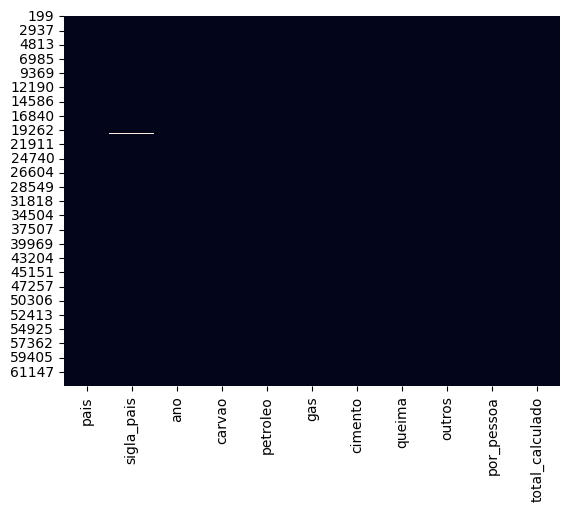

In [102]:
df_missings(df)

print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)


## Coluna sigla_pais

In [103]:
# Possui 84 missings na coluna de sigla_pais que corresponde a 0,4% do dataset
# Vamos verificar quais são esses países
list_pais_onde_sigla_na = list(df[df['sigla_pais'].isnull()].pais.unique())
print(list_pais_onde_sigla_na)

['French Equatorial Africa', 'French West Africa', 'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)', 'Ryukyu Islands']


In [104]:
# Nesta lista de países, nenhuma linha possui sua respectiva sigla?
df_filtred = df[df['pais'].isin(list_pais_onde_sigla_na)]
print(" --- Head dos paises que nao possui siglas ---\n")
display(df_filtred.head())

df_missings(df_filtred)

 --- Head dos paises que nao possui siglas ---



pais sigla_pais   ano    carvao  petroleo  gas  \
19512  French Equatorial Africa        NaN  1950  0.018320  0.157552  0.0   
19513  French Equatorial Africa        NaN  1951  0.007328  0.227168  0.0   
19514  French Equatorial Africa        NaN  1952  0.025648  0.278464  0.0   
19515  French Equatorial Africa        NaN  1953  0.010992  0.245488  0.0   
19516  French Equatorial Africa        NaN  1954  0.003664  0.267472  0.0   

       cimento  queima  outros  por_pessoa  total_calculado  
19512      0.0     0.0     0.0    0.033574         0.175872  
19513      0.0     0.0     0.0    0.044320         0.234496  
19514      0.0     0.0     0.0    0.056706         0.304112  
19515      0.0     0.0     0.0    0.046701         0.256480  
19516      0.0     0.0     0.0    0.048331         0.271136


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais        84         100.0%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%

Temos uma lista de 6 países que não possuem a sua sigla no formato ISO 3166-1 alpha-3

Farei uma pesquisa para encontrar suas respectivas siglas e completar no dataset 

**Resultado da pesquisa:**
- Pacific Islands (Palau): PLW

- French Equatorial Africa: não é mais um país
- French West Africa: não é mais um país
- Kuwaiti Oil Fires: não é um país
- Leeward Islands: não é um país
- Ryukyu Islands: não é um país

In [105]:
# Preencher a sigla_pais "PLW" do pais "Pacific Islands (Palau)"
# porem antes analisarei se existe a sigla PLW em meu dataset
df[df['sigla_pais']=="PLW"].head()

pais sigla_pais   ano  carvao  petroleo  gas  cimento  queima  outros  \
42402  Palau        PLW  1992     0.0  0.197856  0.0      0.0     0.0     0.0   
42403  Palau        PLW  1993     0.0  0.197856  0.0      0.0     0.0     0.0   
42404  Palau        PLW  1994     0.0  0.197856  0.0      0.0     0.0     0.0   
42405  Palau        PLW  1995     0.0  0.197856  0.0      0.0     0.0     0.0   
42406  Palau        PLW  1996     0.0  0.197856  0.0      0.0     0.0     0.0   

       por_pessoa  total_calculado  
42402   12.362909         0.197856  
42403   12.079121         0.197856  
42404   11.798211         0.197856  
42405   11.497240         0.197856  
42406   11.158132         0.197856

Sim existe a sigla PLW no dataset, logo possui dados duplicados na coluna 'pais' e possivel falta de padronização no preenchimento da coluna 'pais'


### País com duplicidade

In [106]:
# Criando uma lista com todos os paises do dataset
print(f"Quantidade de paises: {len(df.pais.unique())}")

Quantidade de paises: 232


São muitos paises para se analisar a duplicidade e padronização.

Existe uma biblioteca do python chamado pycountry

Com esta biblioteca posso criar uma outra coluna com o nome dos paises utilizando a sigla que esta no formato (ISO 3166-1 alpha-3) da coluna sigla.

Entrão os proximos passos são:
 - Organizar a coluna sigla
 - Deletar Coluna paises
 - Recriar coluna paises com o pycountry 

## Coluna sigla_pais (continuação)

In [107]:
# Preencher a sigla_pais "PLW" do pais "Pacific Islands (Palau)"
df.loc[df['pais']=='Pacific Islands (Palau)','sigla_pais'] = "PLW"
df[df['sigla_pais']=="PLW"].head()

pais sigla_pais   ano  carvao  petroleo  gas  \
41821  Pacific Islands (Palau)        PLW  1955     0.0  0.010992  0.0   
41822  Pacific Islands (Palau)        PLW  1956     0.0  0.010992  0.0   
41823  Pacific Islands (Palau)        PLW  1957     0.0  0.014656  0.0   
41824  Pacific Islands (Palau)        PLW  1958     0.0  0.014656  0.0   
41825  Pacific Islands (Palau)        PLW  1959     0.0  0.014656  0.0   

       cimento  queima  outros  por_pessoa  total_calculado  
41821      0.0     0.0     0.0    0.413755         0.010992  
41822      0.0     0.0     0.0    0.405765         0.010992  
41823      0.0     0.0     0.0    0.497742         0.014656  
41824      0.0     0.0     0.0    0.488003         0.014656  
41825      0.0     0.0     0.0    0.476393         0.014656

In [108]:
# Verificar quantas linhas nao possuem sigla_pais
df_sigla_na = df[df['sigla_pais'].isnull()]
print(f"Possui {df_sigla_na.shape[0]} linhas da coluna sigla_pais sem o preenchimento")

# Total de CO2
print(f"Estas linhas possui um total de {df_sigla_na['total_calculado'].sum().round(2)} Milhões de toneladas de CO2")

# Porcentagem
calculed = ((df_sigla_na['total_calculado'].sum() / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")


Possui 47 linhas da coluna sigla_pais sem o preenchimento
Estas linhas possui um total de 511.42 Milhões de toneladas de CO2
Isso representa 0.015% de CO2 do dataset


Já que estas linhas representam apenas 0.015% de emissão de CO2 e não estão representando países validos elas serão removidas.

In [109]:
df = df[df['sigla_pais'].isnull() ==False]
df_missings(df)


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais         0           0.0%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%

Tratamento dos Missings Concluido!

# Tratar Nome dos paises

In [110]:
# Instalar pip do pycountry
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
# Importar pycountry
import pycountry

# Testando biblioteca
country = pycountry.countries.get(alpha_3='AFG')
print(country.name)

Afghanistan


In [112]:
# Visualizar pais formato anterior
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado  
199     0.0    0.000000         0.014656  
200     0.0    0.011266         0.084272  
201     0.0    0.012098         0.091600  
202     0.0    0.011946         0.091600  
203     0.0    0.013685         0.106256

In [113]:
# Atualizar coluna Pais
pais_list = []
for cod in list(df['sigla_pais']):
  pais = pycountry.countries.get(alpha_3=cod)
  # Verificar se todos os codigos são validos
  if pais is not None:
    pais_list.append(pais.name)
  else: 
    pais_list.append('desconhecido')

df['pais_encontrado'] = pais_list
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado pais_encontrado  
199     0.0    0.000000         0.014656     Afghanistan  
200     0.0    0.011266         0.084272     Afghanistan  
201     0.0    0.012098         0.091600     Afghanistan  
202     0.0    0.011946         0.091600     Afghanistan  
203     0.0    0.013685         0.106256     Afghanistan

In [114]:
# Veriricar se ouve pais com codigo desconhecido 
df[df.pais_encontrado == 'desconhecido']

pais sigla_pais   ano        carvao      petroleo  \
18968  Panama Canal Zone        PCZ  1950      0.000000      0.186864   
18969  Panama Canal Zone        PCZ  1951      0.000000      0.190528   
18970  Panama Canal Zone        PCZ  1952      0.000000      0.183200   
18971  Panama Canal Zone        PCZ  1953      0.000000      0.095517   
18972  Panama Canal Zone        PCZ  1954      0.000000      0.080608   
...                  ...        ...   ...           ...           ...   
63099             Global        WLD  2017  14506.973805  12242.627935   
63100             Global        WLD  2018  14746.830688  12266.016285   
63101             Global        WLD  2019  14725.978025  12345.653374   
63102             Global        WLD  2020  14174.564010  11191.808551   
63103             Global        WLD  2021  14979.598083  11837.159116   

               gas      cimento      queima      outros  por_pessoa  \
18968     0.007328     0.000000    0.000000    0.000000    0.000000   
18969     0.007328     0.000000    0.000000    0.000000    0.000000   
18970     0.007328     0.000000    0.000000    0.000000    0.000000   
18971     0.007075     0.000000    0.000000    0.000000    0.000000   
18972     0.003664     0.000000    0.000000    0.000000    0.000000   
...            ...          ...         ...         ...         ...   
63099  7144.928128  1507.923185  391.992176  302.294047    4.749682   
63100  7529.846784  1569.218392  412.115746  302.478706    4.792753   
63101  7647.528220  1617.506786  439.253991  306.638573    4.775633   
63102  7556.290283  1637.537532  407.583673  296.301685    4.497423   
63103  7921.829472  1672.592372  416.525563  296.145746    4.693699   

       total_calculado pais_encontrado  
18968         0.194192    desconhecido  
18969         0.197856    desconhecido  
18970         0.190528    desconhecido  
18971         0.102592    desconhecido  
18972         0.084272    desconhecido  
...                ...             ...  
63099     36096.739276    desconhecido  
63100     36826.506601    desconhecido  
63101     37082.558969    desconhecido  
63102     35264.085734    desconhecido  
63103     37123.850352    desconhecido  

[388 rows x 12 columns]

Encontrado 388 países com siglas não validas, vamos ver quais são esses países 

In [115]:
df[df.pais_encontrado == 'desconhecido'].pais.unique()

array(['Panama Canal Zone', 'Kosovo', 'International Transport', 'Global'],
      dtype=object)

Temos uma lista de 4 casos:

**Panama Canal Zone**: Não é mais uma entidade política independente e não possui um código oficial na norma ISO 3166-1.

**Kosovo**: estado com reconhecimento limitado e atualmente não possui um código ISO 3166-1 alpha-3 oficial

**International Transport**: Não é um pais

**Global**: Não é um pais (O valor Global sera calculado com base ao dataframe após a limpeza)

In [116]:
# Filtrar apenas um df com os países desconhecidos removendo o que for "global"
df_filtred = df[(df.pais_encontrado == 'desconhecido') & (df.pais != "Global")].total_calculado.sum()

# Total de CO2
print(f"Em 'International Transport' possui um total de {df_filtred.round(2)} Milhões de toneladas de CO2")

# Porcentagem
calculed = ((df_filtred / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")

Em 'International Transport' possui um total de 43188.74 Milhões de toneladas de CO2
Isso representa 1.244% de CO2 do dataset


Como o objetivo dessa análise é fazer um estudo de emissão de CO2 levando os países em consideração, todas as colunas que não representão um país sera removida.

In [117]:
df = df[df['pais_encontrado'] != "desconhecido"]
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado pais_encontrado  
199     0.0    0.000000         0.014656     Afghanistan  
200     0.0    0.011266         0.084272     Afghanistan  
201     0.0    0.012098         0.091600     Afghanistan  
202     0.0    0.011946         0.091600     Afghanistan  
203     0.0    0.013685         0.106256     Afghanistan

In [118]:
# Remover coluna 'pais' 
df = df.drop('pais',axis=1)
# Transformar coluna 'pais_encontrado' em 'pais' 
df = df.rename(columns={'pais_encontrado':'pais'})

df.head()

sigla_pais   ano    carvao  petroleo  gas  cimento  queima  outros  \
199        AFG  1949  0.014656  0.000000  0.0      0.0     0.0     0.0   
200        AFG  1950  0.021068  0.063204  0.0      0.0     0.0     0.0   
201        AFG  1951  0.025648  0.065952  0.0      0.0     0.0     0.0   
202        AFG  1952  0.031708  0.059892  0.0      0.0     0.0     0.0   
203        AFG  1953  0.037949  0.068307  0.0      0.0     0.0     0.0   

     por_pessoa  total_calculado         pais  
199    0.000000         0.014656  Afghanistan  
200    0.011266         0.084272  Afghanistan  
201    0.012098         0.091600  Afghanistan  
202    0.011946         0.091600  Afghanistan  
203    0.013685         0.106256  Afghanistan

# Limpeza dos Outliers


In [119]:
df.head()

sigla_pais   ano    carvao  petroleo  gas  cimento  queima  outros  \
199        AFG  1949  0.014656  0.000000  0.0      0.0     0.0     0.0   
200        AFG  1950  0.021068  0.063204  0.0      0.0     0.0     0.0   
201        AFG  1951  0.025648  0.065952  0.0      0.0     0.0     0.0   
202        AFG  1952  0.031708  0.059892  0.0      0.0     0.0     0.0   
203        AFG  1953  0.037949  0.068307  0.0      0.0     0.0     0.0   

     por_pessoa  total_calculado         pais  
199    0.000000         0.014656  Afghanistan  
200    0.011266         0.084272  Afghanistan  
201    0.012098         0.091600  Afghanistan  
202    0.011946         0.091600  Afghanistan  
203    0.013685         0.106256  Afghanistan

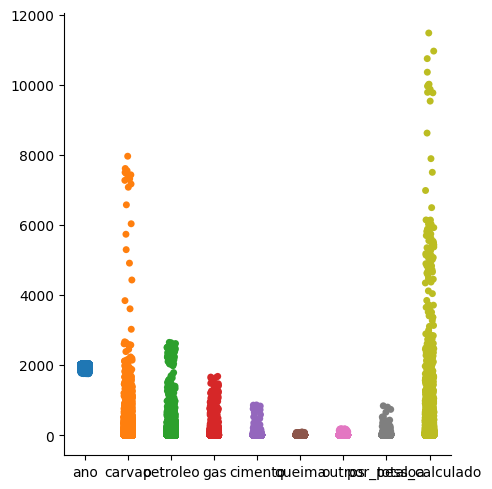

In [120]:
# Visualizar a distribuição de todos os floats do dataset
sns.catplot(df)

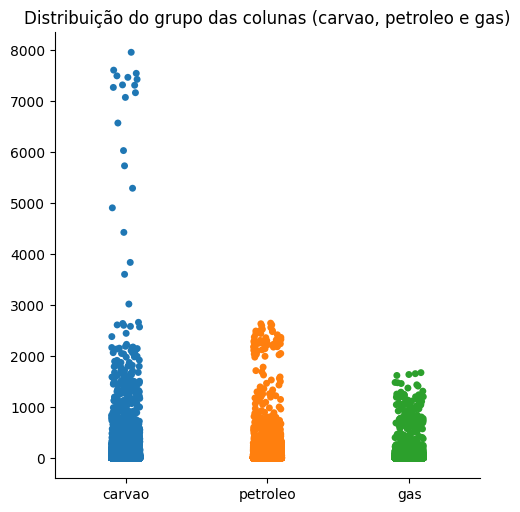

In [121]:
# Separando em grupos para uma melhor visualização
sns.catplot(df[['carvao','petroleo','gas']]).set(title="Distribuição do grupo das colunas (carvao, petroleo e gas)")

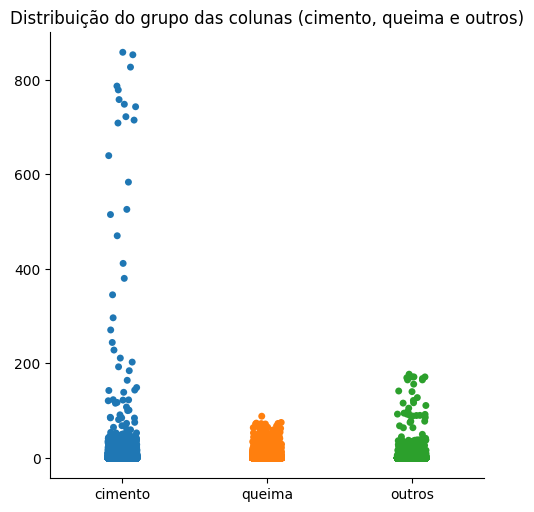

In [122]:
sns.catplot(df[['cimento','queima','outros']]).set(title="Distribuição do grupo das colunas (cimento, queima e outros)")

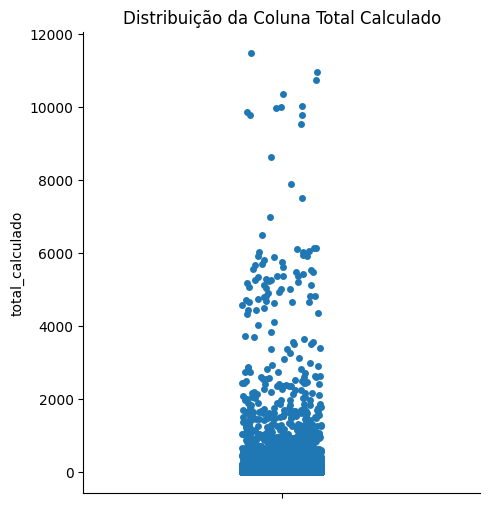

In [123]:
sns.catplot(df.total_calculado).set(title="Distribuição da Coluna Total Calculado")

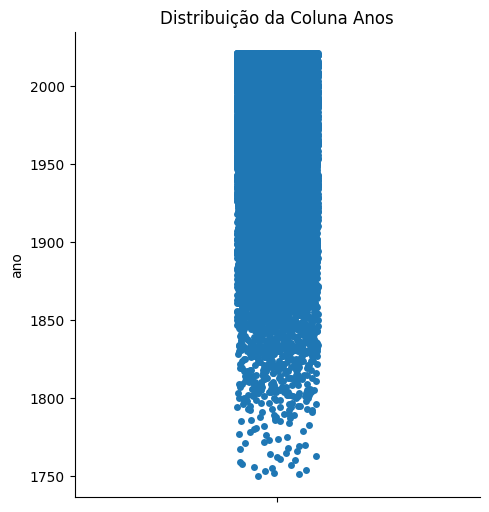

In [124]:
sns.catplot(df.ano).set(title='Distribuição da Coluna Anos')

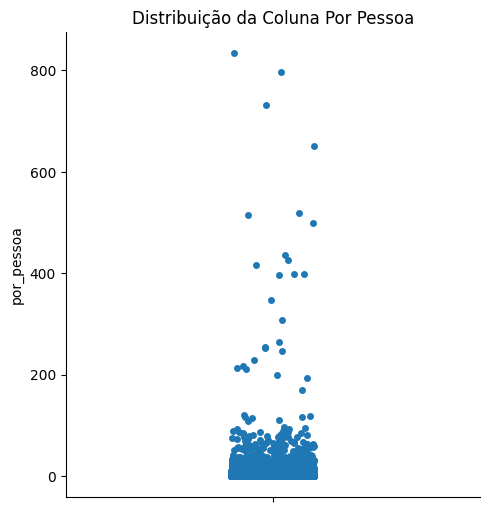

In [125]:
sns.catplot(df.por_pessoa).set(title='Distribuição da Coluna Por Pessoa')

Talvez exista Outliers na coluna "por_pessoa", será analisado

[Text(0.5, 1.0, 'Distribuição da Coluna Por Pessoa')]

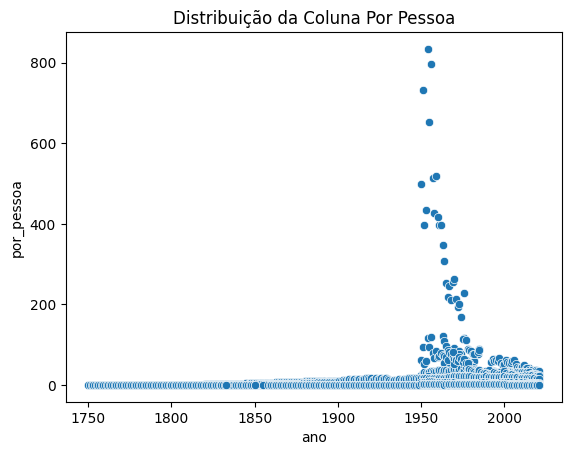

In [126]:
sns.scatterplot(x='ano',y='por_pessoa',data=df).set(title='Distribuição da Coluna Por Pessoa')

[Text(0.5, 1.0, 'Distribuição da Coluna Por Pessoa')]

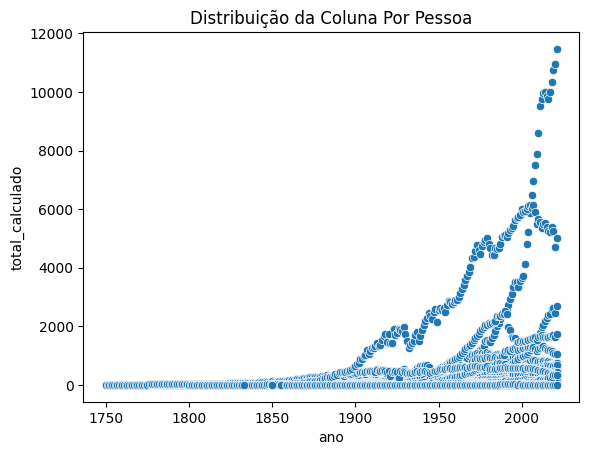

In [127]:
sns.scatterplot(x='ano',y='total_calculado',data=df).set(title='Distribuição da Coluna Por Pessoa')

In [128]:
df[df['por_pessoa']>500]

sigla_pais   ano  carvao  petroleo  gas  cimento  queima  outros  \
48616        SXM  1950     0.0  0.729008  0.0      0.0     0.0     0.0   
48617        SXM  1951     0.0  1.149743  0.0      0.0     0.0     0.0   
48620        SXM  1954     0.0  1.554101  0.0      0.0     0.0     0.0   
48621        SXM  1955     0.0  1.285500  0.0      0.0     0.0     0.0   
48622        SXM  1956     0.0  1.662560  0.0      0.0     0.0     0.0   
48623        SXM  1957     0.0  1.135549  0.0      0.0     0.0     0.0   
48625        SXM  1959     0.0  1.280404  0.0      0.0     0.0     0.0   

       por_pessoa  total_calculado                       pais  
48616  500.005475         0.729008  Sint Maarten (Dutch part)  
48617  731.854547         1.149743  Sint Maarten (Dutch part)  
48620  834.192642         1.554101  Sint Maarten (Dutch part)  
48621  651.545792         1.285500  Sint Maarten (Dutch part)  
48622  796.626925         1.662560  Sint Maarten (Dutch part)  
48623  514.521581         1.135549  Sint Maarten (Dutch part)  
48625  518.382362         1.280404  Sint Maarten (Dutch part)

O pais com maior emissão de CO2 por pessoa é "Sint Maarten (Dutch part)" Trata-se de um pequeno país constituinte localizado no Mar do Caribe com aproximadamente 43.000 pessoas, Já que neste país possui um numero de habitantes reduzido seu valor de emissão por pessoa pode acabar distoando dos demais, logo este dado não se trata como um erro no dataset, seu valor é plausível e não sera descartado.

Após avaliar os possíveis outliers cheguei a conclusão que nenhum dado sera alterado para não perder a integridade do dataset, não foi localizado nenhum dado que possa poluir esta analise.

# Analise de dados

## Emissão total Por ano

In [129]:
# Instalar e importar a biblioteca para plotar graficos mais dinâmicos
!pip install plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
from plotly.graph_objs import YAxis
# A emissão Global de CO2 esta aumentando?

# Ordenar df por data
df = df.sort_values(by=['ano'])
# Agrupando o Total de emissão de carbono por ano
df_filtred = df.groupby('ano')['total_calculado'].sum().reset_index()
# Dados
fig = px.line(df_filtred, x='ano',  y='total_calculado')
# Detalhes
fig.update_layout(title="Emissão Total de CO2 por Ano", xaxis_title="Ano", yaxis_title="Emissão Total (Mt)", height=300)
# Exibir
fig.show()


A partir do Ano de 1900, houve um aumento considerável das emissões de carbono mundiais.

## Emissão total Por ano para cada tipo de combustivel

In [131]:
# Agrupar por Ano, mantendo a soma das colunas das diferentes emissões

df_filtred = df.groupby('ano')[['carvao','petroleo','gas','cimento','queima']].sum().reset_index()

fig = px.line(df_filtred, x='ano', y=['carvao','petroleo','gas','cimento','queima'])
fig.update_layout(title="Tipos de Emissões ao longo dos Ano", xaxis_title="Ano", yaxis_title="Emissões (Mt)", height=300, legend=dict(xanchor="left"))
fig.show()


Possível avaliar:

- Miníma Evolução da queima e do cimento 
- Forte e repentino o crescimento do gás e do petróleo a partir de 1950
- Crescimento constante do carvão desde 1850

In [132]:
# Criar df com o total de cada emissão
df_filtred = pd.DataFrame({'carvao': [df['carvao'].sum()], 
                          'petroleo': [df['petroleo'].sum()], 
                          'gas': [df['gas'].sum()], 
                          'cimento': [df['cimento'].sum()], 
                          'queima': [df['queima'].sum()]})
# Grafico
fig = px.bar(df_filtred)
# Layout
fig.update_layout(
    title='Emissões Total de CO2 por tipo de combustível',
    xaxis_title='Tipo de combustível',
    yaxis_title='Emissões de CO2 (Mt)',
    barmode='group', 
    legend=dict(xanchor="left")
)

fig.show()

Carvão esta a frente na Emissão total de CO2

## Emissão total por ano para cada pais

In [133]:
# Definir coluna com total_acumulado com dados acumulativos
df_filtred = df.sort_values(['ano', 'sigla_pais'])
# calcular a soma acumulada para cada pais
df_filtred['total_acumulado'] = df_filtred.groupby('sigla_pais')['total_calculado'].cumsum()

# Criar grafico do Mundo 
fig = px.choropleth(df_filtred, 
                    locations='sigla_pais', 
                    color='total_acumulado',
                    color_continuous_scale=['gray','yellow','orange','red'], 
                    hover_name='pais',
                    animation_frame='ano',
                    projection='natural earth'
                    )

# Personalização do layout do gráfico
fig.update_layout(title='Emissão total de CO2 por país por ano',
                  # Definir propriedades do mapa
                  geo={
                      'showcountries':True, #Exibir linhas
                      'showcoastlines':True, #Exibir Linha das Costas
                      'coastlinecolor':'gray', #Definir sua cor
                      'showland':True,  #Exibir Terras
                      'landcolor':'lightgray', #Definir sua cor
                      'showocean':True, #Exibir Oceano
                      'oceancolor':'azure', #Definir sua cor
                  },
                  # Definir Legenda Para o Mapa de calor  
                                   
                  coloraxis={'colorbar':
                              {'title':'Total de CO2 (Mt)'}
                             },
                  # Altura do grafico
                  height=600)

# Agilizar animação
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50

# Exibição do gráfico
fig.show()

Nesta Animação foi possível analisar que o pais que mais emitiu CO2 se iniciou em "United Kingdom" passou para os "United States" finalizando com "United States" com maior emissão, "chine" em segundo lugar e depois "Russian"

In [134]:
# Plotar grafico de linha exibindo a emissão total para cada pais por ano
fig = px.line(df, x='ano', y='total_calculado', color='pais')
fig.update_layout(title='Emissão total dos paises por ano',
                  yaxis_title="Emissão CO2 (Mt)",
                  legend=dict(xanchor="left"))

In [135]:
# N° De países a serem mostrados
x=5

# calcular a soma total das emissões de cada país
df_filtred = df.groupby('pais').sum()
# ordenar de forma decrescente pela soma das emissões
df_sorted = df_filtred.sort_values('total_calculado', ascending=False)
# selecionar lista com os 10 primeiros países
top_x = df_sorted.index[:x]
# filtrar o dataframe original para incluir apenas as linhas correspondentes aos x países principais
df_top_x = df[df['pais'].isin(top_x)]

# Criar e Mostrar o grafico
fig = px.line(df_top_x, x='ano', y='total_calculado', color='pais')
fig.update_layout(title='Emissão total dos paises por ano',
                  yaxis_title="Emissão CO2 (Mt)")
fig.show()


# Criar e Mostrar o grafico
fig2 = px.bar(df_sorted.head(x), y='total_calculado')
fig2.update_layout(title='Emissão total dos top {} países'.format(x),
                  xaxis_title='País',
                  yaxis_title='Emissão CO2 (Mt)', 
                  legend=dict(xanchor="left")
                  )

fig2.show()

<ipython-input-135-b271ecd6d859>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Emissão total por ano para cada pais e tipo de combustível

In [136]:
for pais in top_x:
  # Filtrar top x Paises
  df_pais = df[df['pais'] == pais];print('''
  '''+pais)

  # Criar Df Para Grafico de linha
  df_filtred = df_pais.groupby('ano')[['carvao','petroleo','gas','cimento','queima']].sum().reset_index()
  # Criar Grafico de linha
  fig = px.line(df_filtred, x='ano', y=['carvao','petroleo','gas','cimento','queima'])
  fig.update_layout(title="Tipos de Emissões ao longo dos Ano - {}".format(pais),
                    xaxis_title="Ano", yaxis_title="Emissões (Mt)", height=300)
  fig.show()


  # Criar Df Para Grafico de Barra
  df_filtred = pd.DataFrame({'carvao': [df_pais['carvao'].sum()], 
                            'petroleo': [df_pais['petroleo'].sum()], 
                            'gas': [df_pais['gas'].sum()], 
                            'cimento': [df_pais['cimento'].sum()], 
                            'queima': [df_pais['queima'].sum()]})
  # Criar Grafico de Barra
  fig2 = px.bar(df_filtred)
  fig2.update_layout(
      title='Emissões Total de CO2 por tipo de combustível',
      xaxis_title='Tipo de combustível',yaxis_title='Emissões de CO2 (Mt)',
      barmode='group', height=300
  )
  fig2.show()


  United States



  China



  Russian Federation



  Germany



  United Kingdom


Todos os Países ao longo dos Analisados tem o maior consumo de Carvão, porem a partir de 1950 cada pais tem sua alteração de maior consumo 

Possível avaliar tendencia para os próximos anos:
- **United Kingdom:** após 1972 Teve uma diminuição da emissão de CO2, e é possível ver uma tendência de queda para os próximos anos 
- **Germany:** após 1963 Também apresentou uma diminuição da emissão de CO2, e possivel ver uma tendência de estabilidade para os próximos anos 
- **Russian Federation:** Após 1990 Também é possível ver uma diminuição de CO2 para todos os tipos de combustível com tendência de estabilidade, exceto para o gás que além de não ter diminuído como os demais combustíveis, ele continuou aumentando e possui uma tendência de aumento para os próximos anos.
- **China:** Tem uma tendência de subida desde sempre, porem após 1970 sua emissão de CO2 por meio do combustível carvão teve um grande aumento com tendência de aumentar ainda mais.
- **United States:** Apresenta bastante oscilações em suas emissões, tendo um aumento da emissão de CO2 a partir de 1950 predominantemente em Petróleo, carvão e gás 


## Emissão total para cada tipo de combustível por Geo localização 

In [137]:
# Sera que existe uma tendência da emissão de um determinado combustível com base em sua localização no mundo?
# Criar gráfico do Mundo 
for combustival in ['carvao','petroleo','gas','cimento','queima', 'por_pessoa']:
  print('''
  Emissão de CO2 Originado do(a) {} pelos países ao longo dos ano'''.format(combustival))

  if combustival == 'por_pessoa':
    print("\n\n\n Para Aproveitar a estrutura do Codigo Vamos tambem analisar a emissão total de CO2 per capita")

  # Definir coluna com total_acumulado com dados acumulativos
  df_filtred = df.sort_values(['ano', 'sigla_pais'])
  # calcular a soma acumulada para cada pais
  df_filtred[combustival+"_acumulado"] = df_filtred.groupby('sigla_pais')[combustival].cumsum()

  fig = px.choropleth(df_filtred, 
                      locations='sigla_pais', 
                      color=combustival+"_acumulado",
                      color_continuous_scale=['gray','yellow','orange','red'], 
                      hover_name='pais',
                      animation_frame='ano',
                      projection='natural earth'
                      )

  # Personalização do layout do gráfico
  fig.update_layout(title='Emissão de CO2 Originado do {} pro país ao longo dos ano'.format(combustival),
                    # Definir propriedades do mapa
                    geo={
                        'showcountries':True, #Exibir linhas
                        'showcoastlines':True, #Exibir Linha das Costas
                        'coastlinecolor':'gray', #Definir sua cor
                        'showland':True,  #Exibir Terras
                        'landcolor':'lightgray', #Definir sua cor
                        'showocean':True, #Exibir Oceano
                        'oceancolor':'azure', #Definir sua cor
                    },
                    # Definir Legenda Para o Mapa de calor  
                                    
                    coloraxis={'colorbar':
                                {'title':'Total de CO2 (Mt)'}
                              },
                    # Altura do grafico
                    height=500)

  # Agilizar animação
  fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
  # Nao permitir zoom para nao atrabalhar barra de rolagem
  fig.update_layout(xaxis=dict(fixedrange=True),yaxis=dict(fixedrange=True),dragmode=False)


  # Exibição do gráfico
  fig.show()


  Emissão de CO2 Originado do(a) carvao pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) petroleo pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) gas pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) cimento pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) queima pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) por_pessoa pelos países ao longo dos ano



 Para Aproveitar a estrutura do Codigo Vamos tambem analisar a emissão total de CO2 per capita


Não é possível Ver uma predominância do tipo de emissão com base em sua geolocalização, porem é possível ver que o petróleo e o gás se tornou presente a partir de 1860 e que "China" "Rússia" e "Estados Unidos" sempre manterão as posições de maiores emissões de CO2 em exceto na emissão por queima onde a China não entra para os top 3 dando espaço para o "Irã"

## Emissão Per capita

Já no gráfico de emissão per capita o "United Kingdom" se manteve na primeira posição dando espaço depois para "United States" porem depois não foi possível ver no gráfico a posição final, pois esta posição pertence a "Sint Maarten (Dutch part)" analisamos este caso na tratativa de Outliers onde decidi não removê-lo, mas observando nestas condições chego a conclusão que seria melhor removê-lo sim para analisar novamente este gráfico.

In [138]:
df_filtred = df[df.sigla_pais != "SXM"]

# Definir coluna com total_acumulado com dados acumulativos
df_filtred = df_filtred.sort_values(['ano', 'sigla_pais'])
# calcular a soma acumulada para cada pais
df_filtred['por_pessoa'] = df_filtred.groupby('sigla_pais')[combustival].cumsum()

fig = px.choropleth(df_filtred, 
                    locations='sigla_pais', 
                    color='por_pessoa',
                    color_continuous_scale=['gray','yellow','orange','red'], 
                    hover_name='pais',
                    animation_frame='ano',
                    projection='natural earth'
                    )

# Personalização do layout do gráfico
fig.update_layout(title='Emissão de CO2 Originado do {} pro país ao longo dos ano'.format(combustival),
                  # Definir propriedades do mapa
                  geo={
                      'showcountries':True, #Exibir linhas
                      'showcoastlines':True, #Exibir Linha das Costas
                      'coastlinecolor':'gray', #Definir sua cor
                      'showland':True,  #Exibir Terras
                      'landcolor':'lightgray', #Definir sua cor
                      'showocean':True, #Exibir Oceano
                      'oceancolor':'azure', #Definir sua cor
                  },
                  # Definir Legenda Para o Mapa de calor  
                                  
                  coloraxis={'colorbar':
                              {'title':'Total de CO2 (Mt)'}
                            },
                  # Altura do grafico
                  height=500)

# Agilizar animação
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50

# Exibição do gráfico
fig.show()


Caso tenha interesse você pode dar zoom No "Qatar" porem para analisar melhor irei plotar um gráfico de barra levando todos os países em consideração para saber quais são os lugares de emissão de CO2 per capita

In [139]:
# Calcular por_pessoa Acumulativo
df_filtred = df.groupby('pais').sum()

# Ordenar do maior para o menos 
df_filtred = df_filtred.sort_values('por_pessoa',ascending=False)[:15]

# Gerar grafico
fig = px.bar(df_filtred, y='por_pessoa')
fig.update_layout(
    title='Emissões per capita de CO2',
    yaxis_title='Emissões Per Capita de CO2 (t)',
    barmode='group'
)
fig.show()

<ipython-input-139-27ceeb21f56a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Conclusões


A análise realizada demonstrou que a emissão de CO2 tem aumentado ao longo dos anos, conforme ilustrado abaixo 



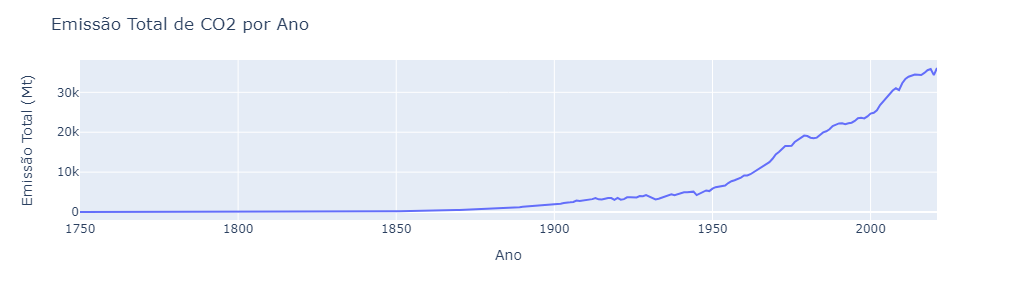


 

Esse aumento pode ser dividido em dois momentos distintos: o período de 1850 a 1950, denominado Momento A, e o 
período de 1950 a 2021, denominado Momento B 



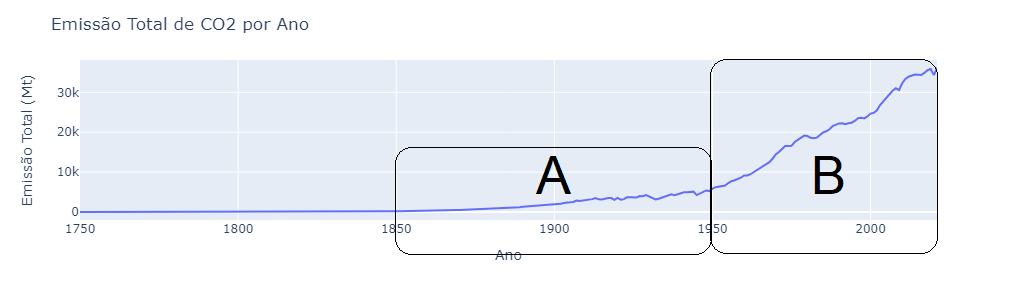

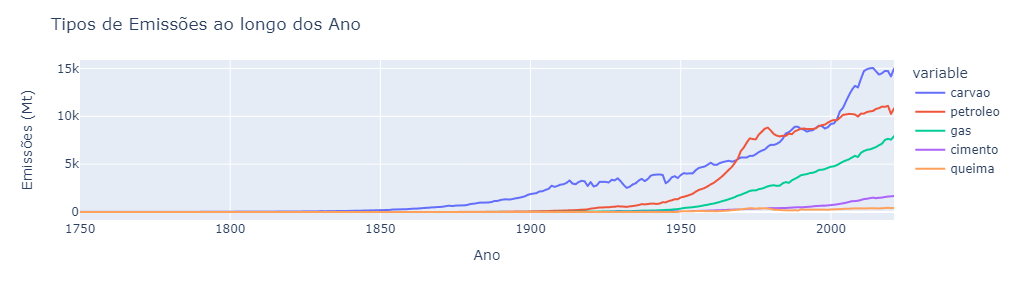


Durante o Momento A, que foi logo após o termino da revolução industrial, houve um crescimento gradativo da emissão de CO2, 
principalmente originado do carvão, que era a principal fonte de energia na época. 
Já durante o Momento B, o crescimento da emissão de CO2 se tornou muito mais expressivo, originado tanto do carvão como do 
petróleo e gás, em razão do rápido crescimento econômico e industrial após a Segunda Guerra Mundial

 

É importante destacar os cinco países que mais emitem CO2


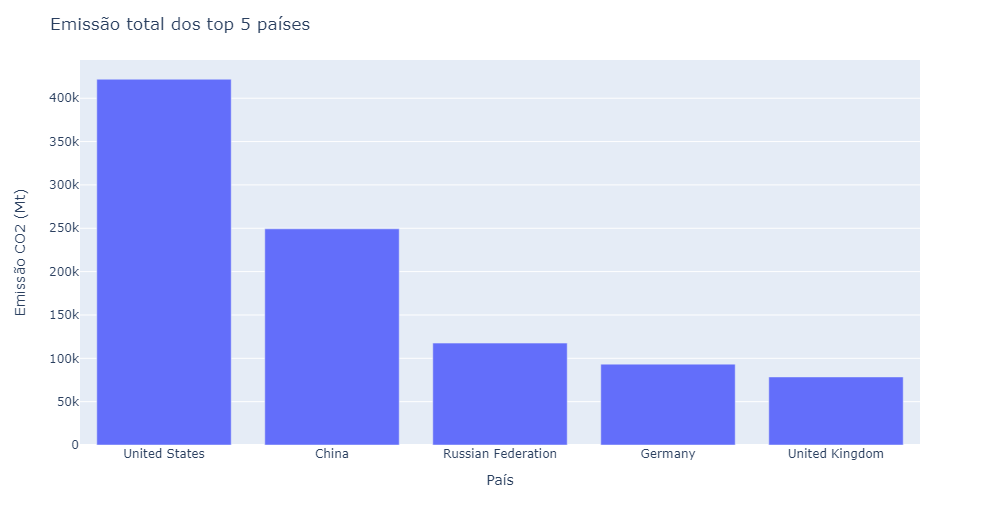

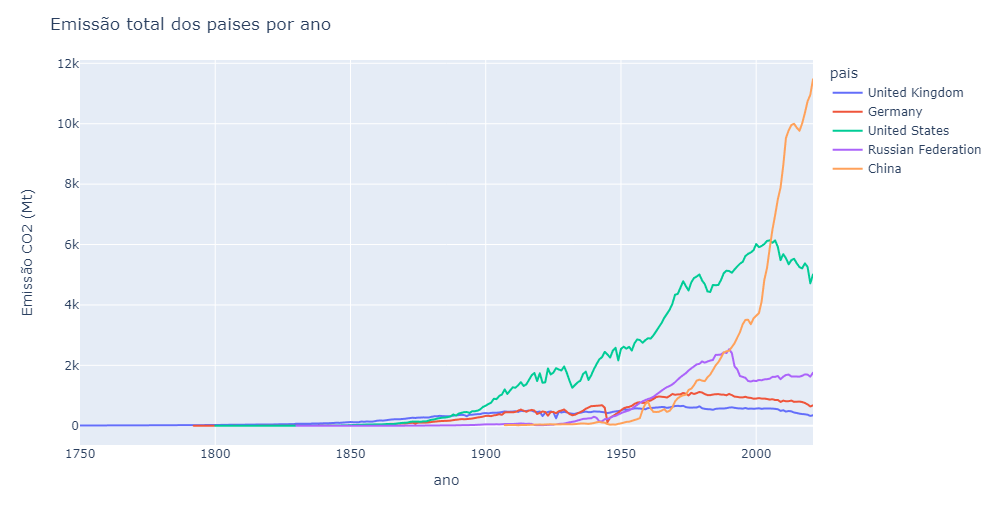




Dentre esses países, os Estados Unidos se mantiveram distantes dos demais em termos de emissão de CO2 até o ano 2000, 
quando a China começou a apresentar um aumento quase exponencial, conforme ilustrado acima


Esse aumento da emissão de CO2 na China tem origem principalmente do carvão, com uma tendência agressiva de aumento


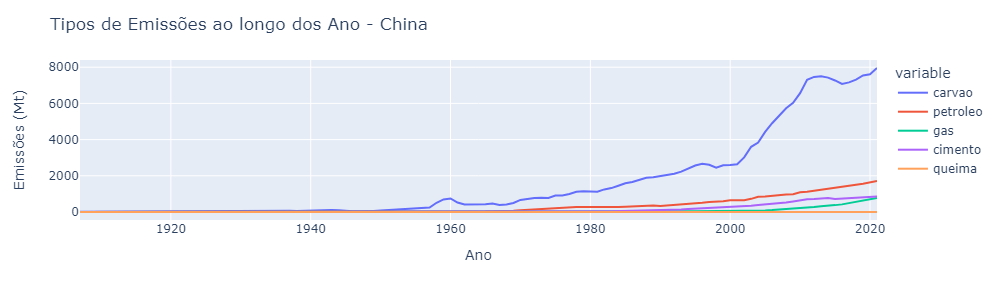


 

Por outro lado, é possível visualizar tendências estáveis ou de queda da emissão de CO2 para os demais países citados


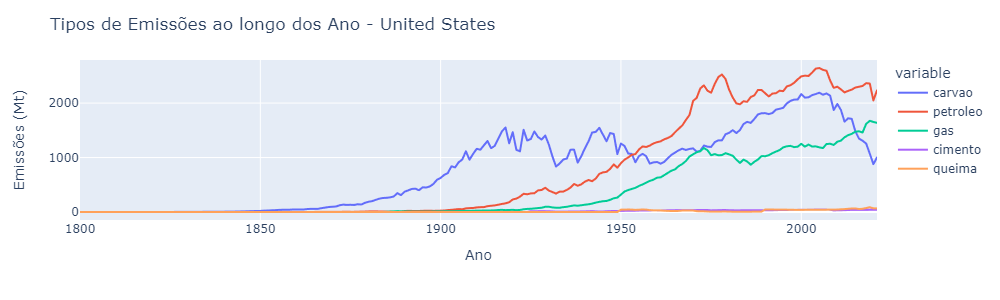

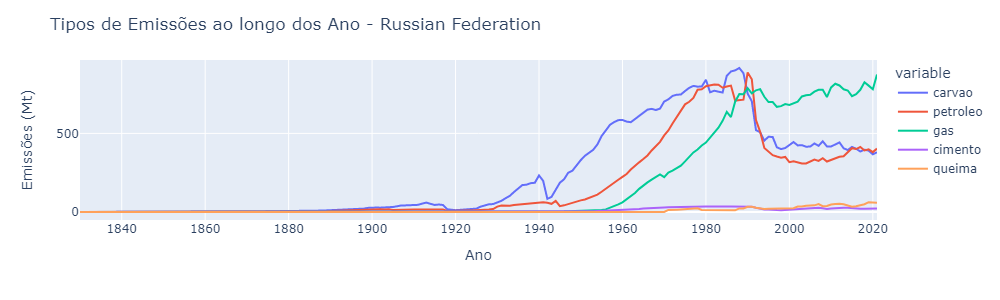

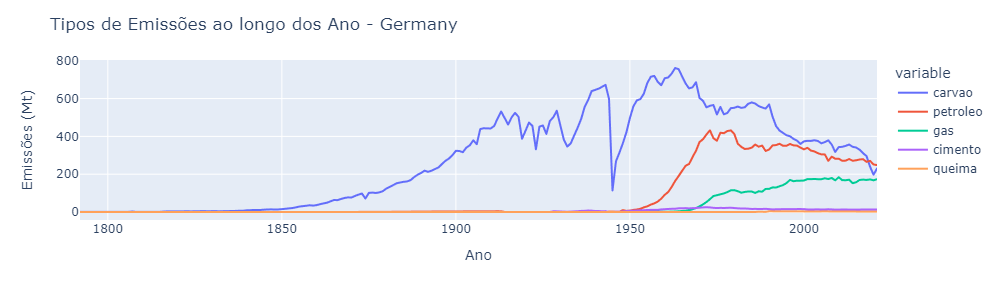

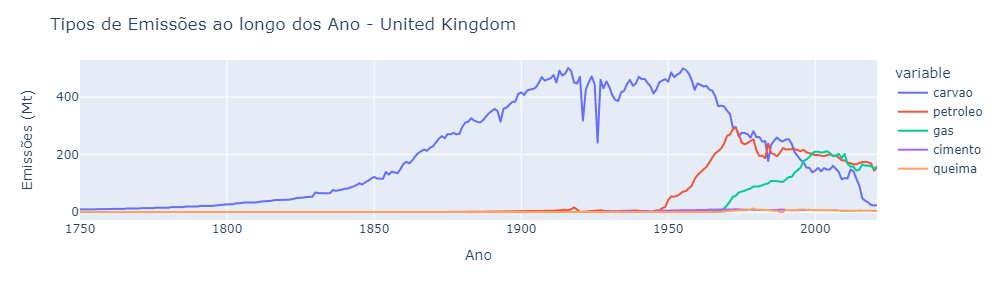

In [140]:
print("A análise realizada demonstrou que a emissão de CO2 tem aumentado ao longo dos anos, conforme ilustrado abaixo \n")
show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img1.png")

print("\n \n")

print('''Esse aumento pode ser dividido em dois momentos distintos: o período de 1850 a 1950, denominado Momento A, e o 
período de 1950 a 2021, denominado Momento B \n''')

show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img1-2.png")
print("\n")

show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img2.png")
print('''
Durante o Momento A, que foi logo após o termino da revolução industrial, houve um crescimento gradativo da emissão de CO2, 
principalmente originado do carvão, que era a principal fonte de energia na época. 
Já durante o Momento B, o crescimento da emissão de CO2 se tornou muito mais expressivo, originado tanto do carvão como do 
petróleo e gás, em razão do rápido crescimento econômico e industrial após a Segunda Guerra Mundial''')

print("\n \n")
print('''É importante destacar os cinco países que mais emitem CO2''')
show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img4.png")
print("\n")
show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img3.png")
print("\n")
print('''
Dentre esses países, os Estados Unidos se mantiveram distantes dos demais em termos de emissão de CO2 até o ano 2000, 
quando a China começou a apresentar um aumento quase exponencial, conforme ilustrado acima''')



print("\n")


print('''Esse aumento da emissão de CO2 na China tem origem principalmente do carvão, com uma tendência agressiva de aumento''')
show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img7.png")

print("\n \n")
print('''Por outro lado, é possível visualizar tendências estáveis ou de queda da emissão de CO2 para os demais países citados''')
show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img6.png")

show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img8.png")

show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img9.png")

show_imagem("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/img/img10.png")


